## Table of Contents
<!-- TOC -->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: Influence of Top Investors](#hypothesis-influence-of-top-investors)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the 2020 and 2021 data from Microsoft SQL Server](#access-the-2020-and-2021-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP1\_startup\_funding2021 Data](#load-lp1_startup_funding2021-data)
      - [Load LP1\_startup\_funding2020 Data](#load-lp1_startup_funding2020-data)
    - [Access 2019 data from OneDrive](#access-2019-data-from-onedrive)
    - [Access the 2018 data from GitHub Repository](#access-the-2018-data-from-github-repository)
  - [Data Quality Considerations](#data-quality-considerations)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

### Background
A "startup" is typically characterized by its age, size, and funding method, though there isn't a strict definition. Generally, a startup is a young company, only a few years old, that hasn't yet achieved consistent revenue. These companies operate on a small scale, often with just a working prototype or a paid pilot, but they have the potential for rapid growth and expansion. Initially, they are funded by the founders' personal networks, including friends and family, and they actively seek additional financing to support their growth and establish a sustainable business.

As an example, the Government of India’s Startup India program defines a “startup” as a company (PIB 2017) that is:

    1. Headquartered in India with not more than ten years since incorporation or registration
   
    2. Having an annual turnover of less than INR 1 billion (roughly $14 million) (Startup India 2019)

`Available:` [ADBI Working Paper Series](https://www.adb.org/publications/startup-environment-and-funding-activity-india)

### Scenario
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action. 

### Objective
The primary objective is to analyse the funding landscape for start-ups in India from 2018 to 2021, focusing on identifying key trends and patterns. This analysis will provide crucial insights into the Indian start-up ecosystem, which will guide strategic decisions for entering and navigating the market effectively. 

### Hypothesis: Influence of Top Investors

**A. Rationale:**

Determining the influence of top investors on the success of start-ups can provide insights into the impact of investor reputation and networks. This can guide new start-ups in selecting potential investors and understanding the benefits of partnering with top-tier investors.

**B. Null Hypothesis (H0):**

Start-ups funded by top investors do not have higher subsequent funding rounds compared to those funded by less active investors.

**C. Alternative Hypothesis (H1):**

Start-ups funded by top investors have higher subsequent funding rounds compared to those funded by less active investors.

### Key Business Questions

**1. Is there a correlation between funding amounts from top investors (blue-chip investors) and the performance metrics of start-ups?**

Exploring the correlation between funding amounts from top investors and start-up performance metrics can help evaluate the effectiveness of investments made by these investors.

**2. Who are the most active investors in the Indian start-up ecosystem?**

Identifying the most active investors can help in analyzing the influence of top investors on subsequent funding rounds.

**3. Are there any geographical trends or hotspots for start-up funding in India?**

Analyzing geographical trends in start-up funding can provide context for understanding the influence of top investors in different regions.

**4. Are there any annual trends in start-up funding in India from 2018 to 2021?**

Understanding annual trends in start-up funding can provide background information for assessing the impact of top investors on subsequent funding rounds.

**5. Which sectors received the most funding each year?**

Analyzing the sectors that received the most funding can provide additional context for evaluating the influence of top investors.

**6. What impact do the years of existence or age of a start-up have on investment opportunities?**

Understanding how the age of a start-up influences investment opportunities can provide insights into whether start-ups funded by top investors indeed have higher subsequent funding rounds.

**7. What are the funding stages (seed, series A, etc.) that received the highest investments?**

Examining the funding stages that received the highest investments can offer insights into the funding patterns of top investors.

### Approach
In conclusion, to understand the trends and patterns in start-up funding in India from 2018 to 2021, a comprehensive approach will be implemented. This will involve gathering detailed data on start-ups, funding amounts, stages, sectors, geographic locations, and investors. The collected data will be analyzed using descriptive statistics, trend analysis, visualizations, and statistical tests to derive key insights. These insights will be compiled into detailed reports and dashboards, providing actionable information and strategic recommendations. Ultimately, this analysis will offer data-driven guidance on the most promising sectors, regions, and funding stages to focus on, identify key investors for potential partnerships, and assess the overall attractiveness of the Indian start-up market for strategic entry.

[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding

`Data Collection`

To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include:

**A. Start-up Details:**

-   Company/Brand: Name of the company/start-up

-   Founded: Year start-up was founded

-   Headquarters/Location: The geographical location of the start-up, including city and region.

-   Sector/Industry: The industry or sector in which the start-up operates, such as healthtech, fintech, etc.

-   What it does/About Company: Description about Company

-   Founders: Founders of the Company

**B. Funding Information:**

-   Amount: The total amount of funding received by the start-up in each funding round.

-   Stage/Round: Details of the funding stages such as seed, series A, series B, etc.

**C. Investors' Information:**

-   Investors: The names of the investors or investment firms involved.

`Data Quality Considerations`

Ensuring high data quality is paramount for reliable analysis and actionable insights. Key considerations for maintaining data quality include:

**A. Completeness:**

Ensure that all necessary fields are filled in across the datasets. This includes making sure that no critical information is missing for any of the start-ups, funding rounds, or investors.

**B. Consistency:**

Handle any inconsistencies in data entries. This may involve standardizing entries for sectors, locations, and investor names to ensure uniformity. For example, variations in how sectors are labeled (e.g., "Healthtech" vs. "Health Technology") should be standardized to a single format.

**C. Handling Missing Data:**

Identify and address missing data points. Techniques such as imputation, where appropriate, or excluding certain records if the missing data is minimal and does not impact overall analysis, will be employed.

### Project Initialisation

In [1]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re

warnings.filterwarnings('ignore')

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

##### Access the 2020 and 2021 data from Microsoft SQL Server

##### Connect to the database using provided credentials

In [2]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values('.env')

# get the values for the environment variables
server = environment_variables.get("DBS")
login = environment_variables.get("DBU")
password = environment_variables.get("DBP")
database = environment_variables.get("DBN")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [3]:
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection established successfully",connection_string)
except Exception as e:
    print("Failed to establish connection:", e)

Connection established successfully DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng


##### Schema for tables in the database

In [4]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    scheschema_df = pd.read_sql(db_query, connection)
    print("Data retrieved successfully")
    print(schema_df)
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully
  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE


##### LP1_startup_funding2021 Data

In [5]:
#Define the SQL query to show specific tables in the database
query_2021 = """
        SELECT *
        FROM LP1_startup_funding2021        
        """
#Read data from the SQL query result into a dataframe
df_2021 = pd.read_sql(query_2021, connection)

# Display dataframe Info
df_2021.info()
print()

# Display the dataframe
df_2021.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


##### LP1_startup_funding2020 Data

In [6]:
#Define the SQL query to show specific tables in the database
query_2020 = """
        SELECT *
        FROM LP1_startup_funding2020        
        """
#Read data from the SQL query result into a dataframe
df_2020 = pd.read_sql(query_2020, connection)

# Display dataframe Info
df_2020.info()
print()

# Display the dataframe
df_2020.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


#### 2019 Data from Onedrive

In [7]:
#CSV file path
file_path = '../Indian_Startup_Ecosystem/Data/startup_funding2019.csv'
#Read data from the file path into a dataframe
df_2019 = pd.read_csv(file_path)

# Display dataframe Info
df_2019.info()
print()

# Display the dataframe
df_2019.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


#### 2018 Data from Github repository

In [8]:
# url for the csv file
url = "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv"

# Local file path
local_path = '../Indian_Startup_Ecosystem/startup_funding2018.csv'

# Send a GET request to the URL
try:
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    # Save the response content to a local file
    with open(local_path, "wb") as f:
        f.write(response.content)
    print("File saved successfully")
except requests.exceptions.RequestException as e:
    print(f"Failed to download file: {e}")

# Read data from the file path into a dataframe
try:
    df_2018 = pd.read_csv(local_path)
    print("File read successfully")
except pd.errors.ParserError as e:
    print(f"Parser error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Display dataframe Info
df_2018.info()
print()
# Display the dataframe
df_2018.head(2)

File saved successfully
File read successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


#### Brief Data Standardization Considerations

In [9]:
# Print column names of all Dataframes
print("Column names of 2021 dataframe:")
print(df_2021.columns)

print("\nColumn names of 2020 dataframe:")
print(df_2020.columns)

print("\nColumn names of 2019 dataframe:")
print(df_2019.columns)

print("\nColumn names of 2018 dataframe:")
print(df_2018.columns)

Column names of 2021 dataframe:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

Column names of 2020 dataframe:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

Column names of 2019 dataframe:
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

Column names of 2018 dataframe:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


In [10]:
# Create column names mapping dictionary

# Define the column mappings for each dataframe
column_mapping = {
    'Company_Brand': 'company_brand',
    'Founded': 'founded',
    'HeadQuarter': 'head_quarter',
    'Sector': 'sector',
    'What_it_does': 'what_it_does',
    'Founders': 'founders',
    'Investor': 'investor',
    'Amount': 'amount',
    'column10': 'column_10',
    'Stage': 'stage',
    'Company/Brand': 'company_brand',
    'What it does': 'what_it_does',
    'Amount($)': 'amount',
    'Company Name': 'company_brand',
    'Industry': 'sector',
    'Round/Series': 'stage',
    'Location': 'head_quarter',
    'About Company': 'what_it_does'
}

In [11]:
# Rename the columns

df_2021.rename(columns=column_mapping, inplace=True)
df_2020.rename(columns=column_mapping, inplace=True)
df_2019.rename(columns=column_mapping, inplace=True)
df_2018.rename(columns=column_mapping, inplace=True)

# Display renamed column names

print("Column names of 2021 dataframe:")
print(df_2021.columns)

print("\nColumn names of 2020 dataframe:")
print(df_2020.columns) 

print("\nColumn names of 2019 dataframe:")
print(df_2019.columns)

print("\nColumn names of 2018 dataframe:")
print(df_2018.columns)  

Column names of 2021 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage'],
      dtype='object')

Column names of 2020 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'column_10'],
      dtype='object')

Column names of 2019 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage'],
      dtype='object')

Column names of 2018 dataframe:
Index(['company_brand', 'sector', 'stage', 'amount', 'head_quarter',
       'what_it_does'],
      dtype='object')


In [12]:
# add funded year column to each dataframe for ease of comparison

df_2021['funded_year'] = 2021
df_2020['funded_year'] = 2020
df_2019['funded_year'] = 2019
df_2018['funded_year'] = 2018

In [13]:
# Check shape of the dataframes

print("Number of columns in 2021 dataframe:", df_2021.shape[1])
print("Number of columns in 2020 dataframe:", df_2020.shape[1])
print("Number of columns in 2019 dataframe:", df_2019.shape[1])
print("Number of columns in 2018 dataframe:", df_2018.shape[1])

Number of columns in 2021 dataframe: 10
Number of columns in 2020 dataframe: 11
Number of columns in 2019 dataframe: 10
Number of columns in 2018 dataframe: 7


In [14]:
# Based on the dimensions of the dataframes, concatenate dataframes by concatenating them.

df = pd.concat([df_2021, df_2020, df_2019, df_2018], ignore_index=True)
df.head(2)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   head_quarter   2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   funded_year    2879 non-null   int64  
 10  column_10      2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [15]:
# Calculate the number of missing values in the column10 column in the 2020 dataframe
missing_values_count = df["column_10"].isna().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of missing values
percentage_missing = (missing_values_count / total_rows) * 100

# Display the percentage of missing values
print(f"Percentage of missing values in column_10: {percentage_missing:.2f}%")

Percentage of missing values in column_10: 99.93%


In [16]:
# Drop column_10 per results above
df.drop(columns=['column_10'], axis=1, inplace=True)

# Display the updated DataFrame
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   head_quarter   2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   funded_year    2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021


### Data Quality Considerations
The datasets are carefully examined to identify common data quality issues such as missing values, outliers, duplicates, inconsistencies, and errors. 

##### Missing and Duplicate Data Quality Considerations

In [17]:
# Determine the proportion of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows = df[df.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in dataset:")
print()
print(missing_percentage)
print("\nNumber of duplicated rows in the dataset:", duplicate_count)
print("\nDuplicated rows in the dataset:")
duplicated_rows

Proportion of missing values in dataset:

company_brand     0.00
founded          26.71
head_quarter      3.96
sector            0.63
what_it_does      0.00
founders         18.93
investor         21.74
amount            8.93
stage            32.58
funded_year       0.00
dtype: float64

Number of duplicated rows in the dataset: 46

Duplicated rows in the dataset:


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021


##### Unique values Data Quality Considerations

In [18]:
# List all elements in the columns
for i, column in enumerate(df.columns):
    print(f'Column-{i + 1}: {column}: {len(df[column].unique())}\n', df[column].unique())
    print('_'*100)
    print()

Column-1: company_brand: 2214
 ['Unbox Robotics' 'upGrad' 'Lead School' ... 'Mombay' 'Droni Tech'
 'Netmeds']
____________________________________________________________________________________________________

Column-2: founded: 35
 [2019. 2015. 2012. 2021. 2014. 2018. 2016. 2020. 2010. 2017. 1993. 2008.
 2013. 1999. 1989. 2011.   nan 2009. 2002. 1994. 2006. 2000. 2007. 1978.
 2003. 1998. 1991. 1984. 2004. 2005. 1963. 1982. 1995. 1973. 2001.]
____________________________________________________________________________________________________

Column-3: head_quarter: 174
 ['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Small Towns, Andhra Pradesh' 'Goa'
 'Rajsamand' 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane'
 'Computer Games' 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara'
 'Food & Beverages' 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata'
 'Ahmedabad' 'Mohali' 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur'
 'West Ben

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 2214**

In the context of identifying odd entries in a list of startup names, duplicates are considered odd because they deviate from the expectation that each entry should be unique. In order to identify duplicate startups the following steps are carried out:

1.  Identify key features that represent the core information of a startup
   
2.  Filter duplicates in the dataset based on these key features

In [19]:
# Define key columns to identify duplicates
key_columns = ['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does', 'founders']

# Check for number of duplicated values within the 'Company_Brand' column
dup1_count = df.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_c1 = df[df.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_c1 = dup_c1['company_brand'].unique()

# Display results
print(f"Number of duplicated values in 'company_brand' column: {dup1_count}")
print("\nList of duplicated company brands:")
print(unidup_c1)
dup_c1

Number of duplicated values in 'company_brand' column: 171

List of duplicated company brands:
['DealShare' 'Razorpay' 'Curefoods' 'TartanSense' 'Bewakoof' 'Kirana247'
 'FanPlay' 'NeoDocs' 'IsGoingOnline' 'Camp K12' 'Elda Health' 'Sporjo'
 'Advantage Club' 'SuperGaming' 'Ruptok' 'Trinkerr' 'Zorro'
 'Ultraviolette' 'NephroPlus' 'Unremot' 'FanAnywhere' 'PingoLearn' 'Spry'
 'Enmovil' 'ASQI Advisors' 'Insurance Samadhan' 'Evenflow Brands'
 'MasterChow' 'Fullife Healthcare' 'Codingal' 'BharatPe'
 'Nazara Technologies' 'MPL' 'Unacademy' 'BlackSoil' 'Spinny' 'KreditBee'
 'Cashfree' "BYJU'S" 'True Balance' 'Euler Motors' 'Northern Arc'
 'Cashify' 'Delhivery' 'Credgenics' 'Nykaa' 'Krimanshi' 'FreshtoHome'
 'Genius Teacher' 'Byju’s' 'Zomato' 'Trell' 'HomeLane' 'HungerBox'
 'Magicpin' 'Cuemath' 'Aye Finance' 'Zetwerk' 'LetsTransport' 'BankBazaar'
 'Rentmojo' 'Khatabook' 'Clover' 'Medlife' 'Vedantu' 'Credr' 'Yap' 'Box8'
 'Capital Float' 'Rebel Foods' 'Lido Learning' 'Swiggy' 'Vogo'
 'Digit Insuran

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
14,DealShare,2018.0,Jaipur,E-commerce,DealShare is a Social Commerce Startup,"Sankar Bora, Sourjyendu Medda, Vineet Rao","Tiger Global Management, InnoVen Capital","$9,000,000",None,2021
20,Razorpay,2014.0,Bangalore,FinTech,Razorpay is a platform that enables businesses...,"Harshil Mathur, Shashank Kumar","Matrix Partners India, GIC","$160,000,000",Series E,2021
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None,2021
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
...,...,...,...,...,...,...,...,...,...,...
2331,Cuemath,2013.0,Bangalore,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G...","$5,500,000",NaN,2019
2338,Credr,2014.0,Mumbai,Automobile,A marketplace to buy and sell used bikes and s...,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...","$6,000,000",NaN,2019
2345,Zoomcar,2013.0,Bangalore,Transport & Rentals,A car rental service platform,"Greg Moran, David Back",Zoomcar Inc,"$4,800,000",NaN,2019
2353,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018


**Column-2: founded: 35**

To identify odd entries in the column that identifies the year in which startup companies in India were founded, we need to focus on identifying entries that deviate from the expected range or format. Specifically, we should consider:

1. Missing or NaN values.
  
2. Years that are unusually old for a startup context.
     -  The range of 1980 to 2024 encompasses a period marked by significant technological innovation, economic dynamism, cultural shifts, and global connectivity, making it reasonable to classify companies founded within this timeframe as startups [United Nations DESA](https://econpapers.repec.org/scripts/redir.pf?u=http%3A%2F%2Fwww.un.org%2Fesa%2Fdesa%2Fpapers%2F2019%2Fwp158_2019.pdf;h=repec:une:wpaper:158), [WEForum](https://www.weforum.org/agenda/2024/01/9-forces-reshaping-the-global-business-landscape/#:~:text=URL%3A%20https%3A%2F%2Fwww.weforum.org%2Fagenda%2F2024%2F01%2F9), [Mercatus Center](https://www.mercatus.org/research/research-papers/technological-innovation-and-economic-growth), [MDPI - Sustainability 2020](https://doi.org/10.3390/su12208323).
  
     -  [Go to Definition of an Indian Startup](#background)



3. Non-numeric values or invalid year formats.

In [20]:
# Define criteria for odd entries in the 'founded' column
def is_odd_year(year):
    
    # Check for missing values
    if pd.isnull(year):
        return True
    
    # Check if the year is not numeric
    if not isinstance(year, (int, float)):
        return True
    
    # Assuming startups would not be founded before 1980 or after 2024
    if year < 1980 or year > 2024:  
        return True
    
    # If the year passes all criteria, it's not considered odd
    return False

# Filter odd entries in the 'founded' column
odde_c2 = df[df['founded'].apply(is_odd_year)]['founded']

# Calculate the number of unique odd entries
oddn_c2 = len(odde_c2.unique())

# Print the number of odd entries and their details
print(f"Number of odd entries in 'founded' column: {oddn_c2}")
print('\nOdd entries:')
for entry in odde_c2:
    print(entry)

Number of odd entries in 'founded' column: 4

Odd entries:
nan
1978.0
1963.0
1978.0
nan
nan
nan
nan
nan
nan
1973.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

**Column-3: head_quarter: 174**

To identify odd entries in the column that lists headquarters or locations in India where startup companies are found, we need to identify entries that do not fit the typical format of Indian city names or locations. Odd entries might include:

1. Missing or NaN values
   
2. Locations outside India.
   
3. Non-geographical entities.
   
4. Entries with noticeable errors or typographical mistakes.

In [21]:
# Identifying odd entries
def is_odd_location(location):
    
    # Check for missing values
    if pd.isnull(location):
        return True
    
    # Check for None values
    if location is None:
        return True
    
    # Strip leading and trailing spaces
    location = location.strip()

    # Check for empty strings
    if len(location) == 0:
        return True
    
    # Define non-geographical keywords
    non_geographical_keywords = ['computer games', 'food & beverages', 'online media', 'information technology & services']

    # Check if the lowercase input string contains any of the lowercase non-geographical keywords
    if any(keyword.lower() in location.lower() for keyword in non_geographical_keywords):
        return True

    # Check for special characters indicating errors or typos
    if '\t#REF!' in location:
        return True
    
    # Check for numeric characters within the location
    if any(non_alpha for non_alpha in location if non_alpha.isdigit()):
        return True
    
    # Check for comma-separated entries
    if ',' in location:
        parts = location.split(',')
        # Check for irregularities in comma-separated entries
        if len(parts) > 2 or any(len(part.strip()) == 0 for part in parts):
            return True
        # Check if the second part contains non-alphabetical characters
        if not parts[1].strip().replace(" ", "").isalpha():
            return True
    
    # Check if the location is not among the predefined list of Indian locations
    return location not in [
        'Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad', 'Jaipur',
        'Ahmadabad', 'Chennai', 'Goa', 'Rajsamand', 'Ranchi', 'Faridabad',
        'Gujarat', 'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
        'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
        'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
        'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
        'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
        'Telugana', 'Bhubaneswar', 'Kottayam', 'Panaji', 'Satara', 'Orissia',
        'Jodhpur', 'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
        'Kochi', 'The Nilgiris', 'Gandhinagar'
    ]

# Filter odd entries in the 'head_quarter' column
odde_c3 = df[df['head_quarter'].apply(is_odd_location)]['head_quarter']

# Extract unique odd entries
oddn_c3 = odde_c3.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'head_quarter' column: {len(oddn_c3)}")
print('\nOdd entries:')
for entry in oddn_c3:
    print(entry)


Number of odd entries in 'head_quarter' column: 117

Odd entries:
None
Small Towns, Andhra Pradesh
Faridabad, Haryana
Computer Games
Food & Beverages
Pharmaceuticals	#REF!
Gurugram	#REF!
Beijing
New York
Santra
Mountain View, CA
Online Media	#REF!
London
Information Technology & Services
Belgaum
Tirunelveli, Tamilnadu
Singapore
Kerala
Jaipur, Rajastan
Delhi
Frisco, Texas, United States
California
Dhingsara, Haryana
New York, United States
San Francisco, California, United States
San Francisco, United States
San Ramon, California
Paris, Ile-de-France, France
Plano, Texas, United States
Sydney
San Francisco Bay Area, Silicon Valley, West Coast
Bangaldesh
London, England, United Kingdom
Sydney, New South Wales, Australia
Milano, Lombardia, Italy
Palmwoods, Queensland, Australia
France
San Francisco Bay Area, West Coast, Western US
Trivandrum, Kerala, India
Samastipur, Bihar
Irvine, California, United States
Tumkur, Karnataka
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom
Shangha

`Comment`

Non-geographical descrepancies will be updated to 'Not filled', and any potential geographical discrepancies will be corrected accordingly. International geographical entries with minimal occurrences will be removed if their exclusion does not compromise data integrity.

**Column-4: sector: 875**

To identify odd entries in the given list of sectors of startups in India, we need to consider entries that do not align with typical startup sectors or contain errors. Odd entries might include:

1. Missing or NaN values

2. Location entries
   
3. Sectors with more than 5 words
   
4. Typos or mispellings
   
5. Uncommon abbreviations
   
6. Inconsistent formatting
   
7. Non-industry terms and unusaul sectors

In [22]:
# Define a funtion to identifyodd entries in the list of statup sectors
def is_odd_sector(sector):
    
    # Check for missing values
    if pd.isnull(sector):
        return True    

    # Strip leading and trailing spaces
    sector = sector.strip()

    # Check for empty strings
    if len(sector) == 0:
        return True
    
    # Check for location entries
    if ',' in sector:
        return True
    
    # Check for sectors with more than 5 words
    if len(sector.split()) > 5:
        return True
    
    # Check for typos or misspellings
    if 'Helathcare' in sector or 'equiptment' in sector:
        return True
    
    # Check for numeric values within the sector
    if re.search(r'\d', sector):
        return True
    
    # Check for inconsistent formatting
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in sector for char in special_characters):
        return True
    
    # Check for Non-industry terms and unusual sectors
    non_industry_terms = ['hauz khas', 'music', 'manchester', 'sochcast', 'matrimony', 'company-as-a-service', 'startup', 'news','dating', 'PaaS', 'Music' 'Hauz Khas' ]
    if any(term.lower() in sector.lower() for term in non_industry_terms):
        return True
    
    return False

# Filter odd entries in the 'Sector' column
odde_c4 = df['sector'].apply(is_odd_sector)
oddn_c4 = df[odde_c4]['sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'sector' column: {len(oddn_c4)}")
print('\nOdd entries:')
for entry in oddn_c4:
    print(entry)

Number of odd entries in 'sector' column: 489

Odd entries:
AI startup
B2B E-commerce
Tech Startup
E-commerce
B2B service
Helathcare
IT startup
Food & Beverages
Dating
Milk startup
SaaS startup
Apparel & Fashion
Logistics & Supply Chain
Wine & Spirits
Mechanical & Industrial Engineering
Tech startup
Information Technology & Services
B2B marketplace
E-learning
Venture Capital & Private Equity
Health, Wellness & Fitness
Software Startup
Computer & Network Security
Hospital & Health Care
Music
Hauz Khas
Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.
MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.
B2B Ecommerce
Cannabis startup
B2B Marketplace
B2B Manufacturing
TaaS startup
EV startup
Blockchain startup
Manufacturing startup
Vehicle repair startup
Pollution control equiptment
Fashion & Lifestyle
D2C
Marketing & Advertising
D2C B

Comments`

The 'Sector' column contains numerous unique values, many of which are worded differently despite having the same meaning. There are two approaches to address this column:

**1. Maintaining Current Granularity:** This approach involves standardizing the terminology by assigning a single term to synonymous entries and replacing odd or inconsistent entries with either a suitable existing term or 'Not filled'.
   
**2. Defining Descriptive and Collective Bins:** This method involves categorizing the sectors into broader, descriptive bins. These bins can be defined within the existing 'Sector' column or by creating a new column named 'Sector_Category'. The proposed bins include, but are not limited to, the following categories:
   
   - Technology & Innovation

   - Health & Wellness

   - Finance & Commerce

   - Consumer Goods & Services

   - Media & Marketing

   - Transportation & Mobility

   - Industrial & Manufacturing

   - Legal & Professional Services

   - Art & Design

   - Education & Training

   - Environmental & Renewable Energy

   - Real Estate & Construction

   - Food & Beverage Industry
      
   - Social & Community Services

**Column-5: what_it_does: 2691**

To identify odd entries in the given list of what startups do in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 5
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [23]:
# Define a function to identify odd entries in the list of startup activities
def is_odd_activity(activity):
    
    # Check for missing values
    if pd.isnull(activity):
        return True    

    # Strip leading and trailing spaces
    activity = activity.strip()

    # Check for empty strings
    if len(activity) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', activity):
        return True
    
    # Check for entries containing unusual special characters and a word count less than 5
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in activity for char in special_characters) and len(activity.split()) < 5:
        return True
    
    return False

# Filter odd entries in the 'What_it_does' column
odde_c5 = df['what_it_does'].apply(is_odd_activity)
oddn_c5 = df[odde_c5]['what_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'what_it_does' column: {len(oddn_c5)}")
print('\nOdd entries:')
for entry in oddn_c5:
    print(entry)


Number of odd entries in 'what_it_does' column: 60

Odd entries:
Tata Digital-backed Curefit
Vikash Mishra, Mragank Jain
Plant-based nutraceutical firm
India's First Icepops Brand
Small businesses-focused non-banking lender
Video integrated social-gaming platform
24*7 convenience store
Video-based social commerce startup
100% Natural Dog Treats.
Sustainability for the future.
World's first cross-border Neobank
Just-in-time Sales Enablement Platform
A gig/on-demand staffing company.
Escrow-as-a-service platform
Pre-seed/Seed focussed VC investor
SaaS-based equity management platform
Crowdfunding, Charity, E-commerce
A multi-game platform
World's largest video publisher
Agri-inputs ecommerce player
User-generated content platform
Subscription-based Water purifier startup
On-demand beauty services provider
India-based hyperlocal delivery startup
Operates vernacular-language based education
Pan-India Credit providing platform
Platform for vernacular test-preparation
Source-to-Pay Software


**Column-6: founders: 1982**

To identify odd entries in the given list of founders of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [24]:
# Define a function to identify odd entries in the list of startup founders.

def is_odd_founder(founder):
    
    # Check for missing values
    if pd.isnull(founder):
        return True
    # Strip leading and trailing spaces
    founder = founder.strip()

    # Check for empty strings
    if len(founder) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founder):
        return True
    

    # Check for entries containing unusual special characters and a word count less than 2
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in founder for char in special_characters) and len(founder.split()) < 2:
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c6 = df['founders'].apply(is_odd_founder)
oddn_c6 = df[odde_c6]['founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'founders' column: {len(oddn_c6)}")
print('\nOdd entries:')
for entry in oddn_c6:
    print(entry)

Number of odd entries in 'founders' column: 2

Odd entries:
None
nan


**Column-7: investor: 1779**

To identify odd entries in the given list of investors of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [25]:
# Define a function to identify odd entries in the list of investors for startups.

def is_odd_investor(investor):
    
    # Check for missing values
    if pd.isnull(investor):
        return True
    # Strip leading and trailing spaces
    investor = investor.strip()

    # Check for empty strings
    if len(investor) == 0:
        return True  
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in investor for char in special_characters) and len(investor.split()) < 3:
        return True
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return True
    
    return False

# Filter odd entries in the 'investor' column
odde_c7 = df['investor'].apply(is_odd_investor)
oddn_c7 = df[odde_c7]['investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'investor' column: {len(oddn_c7)}")
print('\nOdd entries:')
for entry in oddn_c7:
    print(entry)

Number of odd entries in 'investor' column: 60

Odd entries:
CIIE.CO, KIIT-TBI
None
http://100x.vc/
BEENEXT, Orios
9Unicorns, ZNL
$22000000
$5000000
Y-Combinator
Sauce.vc
CIIE.CO
ah! Ventures
Waterbridge, Lumikai
Auxano, Falcon5
GIC, Infoedge
Aqua-Spark
$1000000
Fidelity, BlackRock
velocity.in
Fidelity, GIC
HNIs, Angels
N+1 Capital
Krafton, Lumikai
PayU, Google
Brex, Y-Combinator
NEVF, AccelNest
$Undisclosed
Lightspeed, Sequioa
1000000	#REF!
ICICI Bank.
BlackSoil, Caspian
Flipkart, Walmart
Sequoia Capital.
9Unicorns, Anicut
GoodWorker.
Endiya Partners.
>Vikram Sud
AngelList, Investec
MOX, SOSV
SOSV, Artesian
Startup Basket.
NABVENTURES, Omnivore
Triodos, Caspian
BlackSoil, BEENEXT
Homage Ventures.
Prospect Partners.
Omnivore, Zeroth.AI
Mumbai Angels.
responsAbility, Accel
Madison, Anicut
Chiratae Ventures.
Nestavera Ventures.
Ah! Ventures
Atraxn Partners.
Prosus N.V
Unitus Ventures.
SOSV, Chinaccelerator
Goldman Sachs.
Blume Ventures.
Walmart, Flipkart
nan


**Column-8: amount: 776**

To identify the odd entries in the list of funding amounts to startups in India, we need to consider entries that meet the criteria described below:

1. Format inconsistency

2. Non-numeric values

3. Unusual symbols or standalone special characters


In [26]:
# Define a function to identify odd entries in the list of funding amounts given to startups

def odd_amount(amount):
    
    # Check for missing values
    if pd.isnull(amount):
        return True
    # Strip leading and trailing spaces
    amount = str(amount).strip()

    # Check for empty strings
    if len(amount) == 0:
        return True
    
    # Check if the amount contains only text and/or special characters
    if re.match(r'^[^\d,]+$', str(amount)):
        return True
    
    return False

# Apply the odd_amount function to each element in the 'amount' column of df2021
odde_c8 = df['amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'amount' column has odd entries
oddn_c8 = df[odde_c8]['amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'amount' column: {len(oddn_c8)}")
print('\nOdd entries:')
for entry in oddn_c8:
    print(entry)

Number of odd entries in 'amount' column: 12

Odd entries:
Undisclosed
None
$Undisclosed
Upsparks
Series C
Seed
$undisclosed
ah! Ventures
Pre-series A
$
nan
—


**Column-9: stage: 77**

To identify the odd entries in the 'Stage' column, we need to determine which entries deviate from typical startup funding stages. Odd entries might include:

1. Missing or NaN Values
   
2. Non standard startup funding stages
   
3. Special characters or symbols
   
4. Unsual naming conventions

In [27]:
def odd_stage(stages):
    
    odd_entries = []
    valid_stages = ['Pre-series A', 'Series A', 'Seed', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series F1', 'Series F2', 'Series A+', 'Series B3', 'Early seed', 'Pre-seed', 'Pre-series', 'Pre-series A1', 'Pre-series B', 'Series D1', 'Series A2', 'Seed+',
                    'Private Equity', 'Post-IPO Debt', 'Post-IPO Equity', 'Grant', 'Corporate Round', 'Funding Round', 'Non-equity Assistance', 'Angel', 'Pre-Seed', 'Debt Financing']
    for stage in stages:
        # Check for missing values
        if pd.isnull(stage):
            odd_entries.append(stage)
        elif stage not in valid_stages:
            odd_entries.append(stage)
    return odd_entries

# Identify odd entries in 'Stage' column of df2021
odde_c9 = odd_stage(df['stage'])

# Get unique odd entries
oddn_c9 = set(odde_c9)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'stage' column: {len(oddn_c9)}")
print('\nOdd entries:')
for entry in oddn_c9:
    print(entry)


Number of odd entries in 'stage' column: 44

Odd entries:
$6000000
Seed Investment
Series B+
Angel Round
Pre-seed Round
$1000000
Pre seed Round
Venture - Series Unknown
Series E2
Seed fund
$1200000
Pre series A
Mid series
Bridge Round
None
Bridge
Post series A
Pre-Series B
Edge
$300000
PE
Series A-1
Seed Round & Series A
Pre series C
Pre series B
Undisclosed
Series B2
Series C, D
Seed Funding
Pre series A1
Seed funding
Pre-series C
Pre- series A
Fresh funding
Pre Series A
Debt
Seed round
https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593
Seed A
nan
Secondary Market
Seies A
Pre seed round
Seed Round


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:

**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. This involves checking for repeated start-up names, funding amounts, and investor details.

**B. Eliminate Irrelevant Data:**

Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of funding trends or extraneous information not related to start-up funding.

**C. Handle Missing Values:**

- Imputation: For fields with missing data, use appropriate imputation methods to fill in the gaps. This could involve using mean, median, or mode for numerical values, or the most frequent category for categorical variables.

- Removal: If the amount of missing data is substantial and imputation is not feasible, records are removed entirely. However, this is done if deletion does not significantly impact the overall dataset integrity.
  
**D. Standardise Formats:**

- Dates: Ensure all date fields follow a consistent format (e.g., YYYY-MM-DD) to facilitate accurate time-based analysis.
  
- Funding Amounts: Standardize funding amounts to a common currency and format, ensuring consistency in how values are presented and analysed.

- Categorical Variables: Ensure uniform labelling for categorical variables such as sectors, funding stages, and locations to avoid discrepancies (e.g., "Health Care" vs. "Healthcare").

`Data Transformation`

Data transformation involves modifying the data to better suit the analytical methods to be applied. The steps include:

**A. Aggregate Funding Data:**

- By Year: Summarize funding data on an annual basis to identify year-over-year trends in funding amounts and number of funding rounds.
  
- By Sector: Aggregate funding by sector to determine which industries are receiving the most investment.
  
- By Funding Stage: Summarize data by funding stage (e.g., seed, series A, series B) to understand the distribution of investments across different start-up maturity levels.
  
**B. Normalize Funding Amounts:**

Adjust funding amounts for inflation or currency changes over the years to ensure that comparisons are made on a like-for-like basis. This is important for accurately assessing trends and changes in funding amounts over time.

`Data Integration`

Data integration involves combining multiple datasets into a single, comprehensive dataset for analysis. This includes:

**A. Combine Datasets from Different Years:**

Merge datasets from 2018 to 2021 into a unified dataset. Ensure that the structure and format of data from each year are consistent to facilitate seamless integration. Address any discrepancies or differences in data schema across years to create a cohesive dataset.

**B. Ensure Consistency:**

Verify that all integrated data follows the standardized formats and labelling conventions established during the data cleaning process. Cross-reference and validate combined data to ensure no information is lost or misrepresented during the integration process.

### Data Cleaning

##### Remove Duplicates

**Based on all Features**

In [28]:
# Create a copy of df to avoid modifying the original DataFrame
cl_df = df.copy()

# Remove duplicate rows from cl_df, and reset the index of the resulting DataFrame
cl_df.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   head_quarter   2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2232 non-null   object 
 7   amount         2600 non-null   object 
 8   stage          1927 non-null   object 
 9   funded_year    2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 223.3+ KB


**Based on First Eight Features**

In [29]:
# Filter rows with duplicated values in all columns except the last two
cl_df[cl_df.duplicated(subset=cl_df.columns[0:8], keep=False)]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None,2021
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None,2021
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None,2021
100,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,None,2021
101,Camp K12,2010.0,Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",$12000000,None,2021
102,Elda Health,2020.0,Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures",$1500000,None,2021
103,Sporjo,2020.0,Mumbai,SportsTech,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,$2000000,None,2021
105,SuperGaming,2017.0,Pune,Gaming,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...",$5500000,None,2021
107,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A,2021
108,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A,2021


In [30]:
# Remove duplicate rows based on the first 8 columns, keeping the last occurrence
cl_df.drop_duplicates(subset=cl_df.columns[0:8], inplace=True, ignore_index=True, keep='last')

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2848 non-null   object 
 1   founded        2080 non-null   float64
 2   head_quarter   2734 non-null   object 
 3   sector         2830 non-null   object 
 4   what_it_does   2848 non-null   object 
 5   founders       2304 non-null   object 
 6   investor       2225 non-null   object 
 7   amount         2592 non-null   object 
 8   stage          1927 non-null   object 
 9   funded_year    2848 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 222.6+ KB


**Based on First Seven Features**

In [31]:
# Filter rows with duplicated values in all columns except the last three
cl_df[cl_df.duplicated(subset=cl_df.columns[0:7], keep=False)]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
345,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$95,000,000",None,2021
367,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$5,000,000",None,2021
374,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$6,000,000",Debt,2021
380,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$10,000,000",Debt,2021
611,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital",$350000000,None,2021
766,Cashify,2009.0,Gurugram,E-commerce,Cashify.in is an e-commerce platform for resel...,"Amit Sethi, Mandeep Manocha, Nakul Kumar","Bessemer Venture Partners, CDH Investments","$15,000,000",None,2021
835,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital","$150,000,000",None,2021
1376,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",121000000.0,Series C,2020
1391,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",16000000.0,None,2020
1528,Zomato,2008.0,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford",62000000.0,None,2020


`Comments`

1. MPL (Mobile Premier League) raised $95M and $5M from Pegasus Tech Ventures and Base Partners. The $95M is likely a later-stage round for scaling, while the $5M is probably a seed or early-stage round.

2. BharatPe raised $6M and $10M from InnoVen Capital and Steadview Capital as debt investments. The $6M is likely an early-stage debt round for initial growth, and the $10M a subsequent stage for further scaling.

3. BYJU'S raised $350M and $150M from Tiga Investments and Baron Capital. Both amounts suggest later-stage rounds for business expansion and growth.

    Without further details regarding the specific funding rounds, these inferences are derived solely from the funding amounts. Therefore, before considering the removal of these rows, it is advisable to determine if any of the amounts are outliers. Dropping such outliers should not adversely impact the integrity of the dataset.

***Converting the 'Amount' column to float***

In [32]:
#clean the Amount column of the dataframe
 
def clean_amount(amount):
    try:
        amount = str(amount)
       
 # Check if the value is in Indian Rupees and convert to US Dollars: Using $1 = 68.41 which was the average annual Indian Rupee to US Dollars (2018)
        if "₹" in amount:
            amount = amount.replace("₹", "")
            return round(float(amount) / 68.4113, 2)
        # Check if the value is in US Dollars
        elif "$" in amount:
            amount = amount.replace("$", "")
            return round (float(amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
       
# Clean the Amount column of the DataFrame
# cl_df["amount"] = cl_df["amount"].apply(clean_amount)

# Apply the function to each element in the "Amount" column
cl_df['amount'] = cl_df['amount'].apply(lambda x: clean_amount(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
cl_df['amount'].dtype


dtype('float64')

In [33]:
# # Define a function to convert string to float or NaN if not convertible
# def convert_to_float(value):
#     try:
#         return float(value)
#     except ValueError:
#         return np.nan

# # Apply the function to each element in the "Amount" column
# cl_df['amount'] = cl_df['amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# # Check the data type of the "Amount" column
# cl_df['amount'].dtype


***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'amount' column:
count    2.286000e+03
mean     1.589379e+08
std      3.506936e+09
min      7.500000e+03
25%      1.000000e+06
50%      4.000000e+06
75%      1.900000e+07
max      1.500000e+11
Name: amount, dtype: float64

Skewness for 'amount' column: nan
Kurtosis for 'amount' column: nan


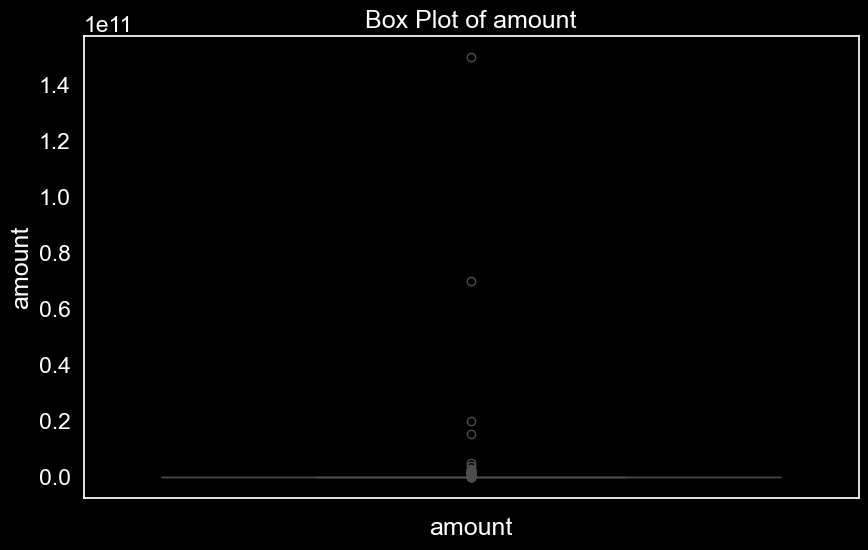

In [34]:
# Descriptive Statistics
print("Descriptive Statistics for 'amount' column:")
print(cl_df['amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df['amount'])
amount_kurtosis = kurtosis(cl_df['amount'])

print(f"\nSkewness for 'amount' column: {amount_skewness}")
print(f"Kurtosis for 'amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df['amount'], palette=custom_palette)
plt.title('Box Plot of amount')
plt.xlabel('amount')
plt.show()

***Drop all duplicates that have none in 'Stage' column***

In [35]:
# Separate rows with 'Debt' in the 'Stage' column
debt_rows = cl_df[cl_df['stage'] == 'Debt']
non_debt_rows = cl_df[cl_df['stage'] != 'Debt']

# Remove all duplicate rows based on the first 7 columns in non-debt rows, keeping the last occurrence
non_debt_rows.drop_duplicates(subset=non_debt_rows.columns[0:7], inplace=True, ignore_index=True, keep=False)

# Concatenate the debt and non-debt rows back together
cl_df = pd.concat([non_debt_rows,debt_rows], ignore_index=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2832 non-null   object 
 1   founded        2064 non-null   float64
 2   head_quarter   2718 non-null   object 
 3   sector         2814 non-null   object 
 4   what_it_does   2832 non-null   object 
 5   founders       2288 non-null   object 
 6   investor       2209 non-null   object 
 7   amount         2270 non-null   float64
 8   stage          1920 non-null   object 
 9   funded_year    2832 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 221.4+ KB


**Based on Key Columns**

In [36]:
# Define the key columns to check for duplicates
key_columns = ['what_it_does', 'head_quarter', 'sector', 'company_brand']

# Check for the number of duplicated values within the key columns
dupl_count = cl_df.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the key columns
dup_cl = cl_df[cl_df.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_cl = dup_cl['company_brand'].unique()

# Display results
print(f"Number of duplicated values in 'company_brand' column: {dupl_count}")
print("\nList of duplicated company brands:")
print(unidup_cl)

Number of duplicated values in 'company_brand' column: 123

List of duplicated company brands:
['DealShare' 'Razorpay' 'TagZ Foods' 'Codingal' 'BharatPe' 'Siply'
 'Nazara Technologies' 'Unacademy' 'BlackSoil' 'Slice' 'Spinny' 'Licious'
 'KreditBee' 'Cashfree' 'CityMall' 'Euler Motors' 'Cashify' 'GoKwik'
 'Delhivery' 'Credgenics' 'True Balance' 'Genius Teacher' 'Trell' 'Mitron'
 'LendingKart' 'HungerBox' 'Vedantu' 'Magicpin' 'Cuemath' 'Aye Finance'
 'Zetwerk' 'LetsTransport' 'Waycool' 'BankBazaar' 'Rentmojo' 'Dunzo'
 'Khatabook' 'Phable' 'Clover' 'DailyHunt' 'Medlife' 'Credr' 'Yap' 'Box8'
 'Capital Float' 'Rebel Foods' 'Lido Learning' 'Swiggy' 'Furlenco'
 'Mera Cashier' 'Digit Insurance' 'Shuttl' 'Byju' 'Zoomcar' 'Purplle'
 'Northern Arc']


***Duplicated columns only in list of duplicated company brands before deletion of duplicates***

In [37]:
# Create a set of the list of duplicated company brands based on key columns before deletion of duplicates
unidup_c1_values = set(unidup_c1)

# Create a set of the list of duplicated company brands based on key columns after deletion of duplicates
unidup_cl_values = set(unidup_cl)

# Find the values that only appear in the list of duplicated company brands before deletion of duplicates
values_only_in_unidup_c1 = unidup_c1_values - unidup_cl_values

# Display Results
print("Values only in list of duplicated company brands before deletion of duplicates:")
print(values_only_in_unidup_c1)

# Filter rows where 'Company_Brand' is 'Values only in list of duplicated company brands before deletion of duplicates'
values_only_in_unidup_c1_rows = cl_df[cl_df['company_brand'].isin(values_only_in_unidup_c1)]

# Filter 'values_only_in_unidup_c1_rows' based on the key columns
values_only_in_unidup_c1_rows[values_only_in_unidup_c1_rows.duplicated(subset=key_columns, keep=False)]

Values only in list of duplicated company brands before deletion of duplicates:
{'MPL', 'FreshtoHome', 'Advantage Club', 'Bewakoof', 'Nykaa', 'SuperGaming', 'Kirana247', 'Sporjo', 'Fullife Healthcare', 'Bounce', 'PingoLearn', 'Ruptok', 'Zomato', 'FanPlay', 'Curefoods', 'FanAnywhere', 'Trinkerr', 'Spry', 'Zorro', 'MasterChow', 'NephroPlus', 'ASQI Advisors', 'Vogo', 'TartanSense', 'Ultraviolette', 'Elda Health', 'Camp K12', "BYJU'S", 'IsGoingOnline', 'Evenflow Brands', 'Enmovil', 'Unremot', 'Krimanshi', 'HomeLane', 'Byju’s', 'TheCollegeFever', 'NeoDocs', 'Insurance Samadhan'}


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year


##### Handling Odd Entries and Irrelevant Data

**Drop companies founded before 1980 and after 2021**

In [38]:
# Drop rows where the 'founded' column has values less than 1980 or greater than 2021
cl_df = cl_df[(cl_df['founded'] >= 1980) & (cl_df['founded'] <= 2021)].reset_index(drop=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2060 non-null   object 
 1   founded        2060 non-null   float64
 2   head_quarter   1987 non-null   object 
 3   sector         2051 non-null   object 
 4   what_it_does   2060 non-null   object 
 5   founders       2051 non-null   object 
 6   investor       1965 non-null   object 
 7   amount         1718 non-null   float64
 8   stage          1269 non-null   object 
 9   funded_year    2060 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 161.1+ KB


In [39]:
cl_df.head()

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


**Replacing and dropping odd locations**

In [40]:
#Define a function that identifies odd locations in the dataset and return only the city alone

def replace_odd_location(location):
    # Check if the location is None or not a string
    if location is None or not isinstance(location, str):
        return 'Not filled'
    
    # Check if the location contains '#REF!'
    if '#REF!' in location:
        return 'Not filled'
    
    # Specific replacements
    if location == 'Faridabad, Haryana':
        return 'Faridabad'
    if location == 'Banglore':
        return 'Bangalore'
    if location == 'Bangalore, Karnataka, India':
        return 'Bangalore'
    if location == 'Mumbai, Maharashtra, India':
        return 'Mumbai'
    if location == 'Gurgaon, Haryana, India':
        return 'Gurgaon'
    if location == 'New Delhi, Delhi, India':
        return 'New Delhi'
    if location == 'Noida, Uttar Pradesh, India':
        return 'Noida'
    if location == 'Hyderabad, Andhra Pradesh, India':
        return 'Hyderabad'
    if location == 'Chennai, Tamil Nadu, India':
        return 'Chennai'
    if location == 'Pune, Maharashtra, India':
        return 'Pune'
    if location == 'Chandigarh, Chandigarh, India':
        return 'Chandigarh'
    if location == 'Bengaluru, Karnataka, India':
        return 'Bangalore'
    if location == 'Kalkaji, Delhi, India':
        return 'Kalkaji'
    if location == 'Delhi, Delhi, India':
        return 'Delhi'
    if location == 'Hubli, Karnataka, India':
        return 'Hubli'
    if location == 'Mohali, Punjab, India':
        return 'Mohali'
    if location == 'Kolkata, West Bengal, India':
        return 'Kolkata'
    if location == 'Kanpur, Uttar Pradesh, India':
        return 'Kanpur'
    if location == 'Jodhpur, Rajasthan, India':
        return 'Jodhpur'
    if location == 'Ahmedabad, Gujarat, India':
        return 'Ahmedabad'
    if location == 'Azadpur, Delhi, India':
        return 'Azadpur'
    if location == 'Haryana, Haryana, India':
        return 'Haryana'
    if location == 'Cochin, Kerala, India':
        return 'Cochin'
    if location == 'Jaipur, Rajasthan, India':
        return 'Jaipur'
    if location == 'Kota, Rajasthan, India':
        return 'Kota'
    if location == 'Anand, Gujarat, India':
        return 'Anand'
    if location == 'Bangalore City, Karnataka, India':
        return 'Bangalore'
    if location == 'Belgaum, Karnataka, India':
        return 'Belgaum'
    if location == 'Thane, Maharashtra, India':
        return 'Thane'
    if location == 'Margão, Goa, India':
        return 'Margao'
    if location == 'Indore, Madhya Pradesh, India':
        return 'Indore'
    if location == 'Alwar, Rajasthan, India':
        return 'Alwar'
    if location == 'Kannur, Kerala, India':
        return 'Kannur'
    if location == 'Trivandrum, Kerala, India':
        return 'Trivandrum'
    if location == 'Ernakulam, Kerala, India':
        return 'Ernakulam'
    if location == 'Kormangala, Karnataka, India':
        return 'Kormangala'
    if location == 'Uttar Pradesh, India, Asia':
        return 'Uttar Pradesh'
    if location == 'Andheri, Maharashtra, India':
        return 'Andheri'
    if location == 'Mylapore, Tamil Nadu, India':
        return 'Mylapore'
    if location == 'Ghaziabad, Uttar Pradesh, India':
        return 'Ghaziabad'
    if location == 'Kochi, Kerala, India':
        return 'Kochi'
    if location == 'Powai, Assam, India':
        return 'Powai'
    if location == 'Guntur, Andhra Pradesh, India':
        return 'Guntur'
    if location == 'Kalpakkam, Tamil Nadu, India':
        return 'Kalpakkam'
    if location == 'Bhopal, Madhya Pradesh, India':
        return 'Bhopal'
    if location == 'Coimbatore, Tamil Nadu, India':
        return 'Coimbatore'
    if location == 'Worli, Maharashtra, India':
        return 'Worli'
    if location == 'Alleppey, Kerala, India':
        return 'Alleppey'
    if location == 'Chandigarh, Chandigarh, India':
        return 'Chandigarh'
    if location == 'Guindy, Tamil Nadu, India':
        return 'Guindy'
    if location == 'Lucknow, Uttar Pradesh, India':
        return 'Lucknow'
    
    # # A simple regex to identify locations with non-geographic content (basic approach)
    if re.search(r'\d', location) or re.search(r'[^a-zA-Z, ]', location) or len(location.split()) > 2:
        return 'Not filled'
    
    # # A list of non-geographic keywords
    non_geographic_keywords = ['Computer Games', 'Food & Beverages', 'Pharmaceuticals', 'Online Media', 'Information Technology & Services', 'Santra',]
    
    # # Check if location is in the list of non-geographic keywords
    if location in non_geographic_keywords:
        return 'Not filled'
    
    return location

# Replace non-geographic odd entries in the 'Location' column
cl_df['head_quarter'] = cl_df['head_quarter'].apply(replace_odd_location)

# List of entries to drop
entries_to_drop = ['Beijing', 'New York', 'Mountain View', 'London', 'Singapore', 'California', 'San Francisco','San Ramon', 'United States', 'Paris', 'Ile-de-France', 'France',
                   'Plano', 'Texas', 'Sydney', 'San Francisco Bay Area', 'Silicon Valley', 'West Coast', 'Bangaldesh', 'England', 'United Kingdom', 'New South Wales', 'Australia',
                   'Shanghai', 'China', 'San Franciscao', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok']

# Drop rows where 'Location' contains any of the entries in the list
cl_df = cl_df[~cl_df['head_quarter'].isin(entries_to_drop)].reset_index(drop=True)

# Display info of Data Frame
#cl_df.info(),


In [41]:
cl_df['head_quarter']

0       Bangalore
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
2030      Andheri
2031    Bangalore
2032      Gurgaon
2033       Mumbai
2034    New Delhi
Name: head_quarter, Length: 2035, dtype: object

**Redistributing entries in sector column**

In [42]:
# View the frequency of unique values in the Sector column
sec_freq = cl_df["sector"].value_counts(dropna=False)

# Display the frequencies
print(sec_freq)

sector
FinTech               169
EdTech                134
E-commerce             68
Financial Services     59
Fintech                53
                     ... 
Water purification      1
Co-working Startup      1
Content publishing      1
Battery                 1
Automotive Startup      1
Name: count, Length: 453, dtype: int64


In [43]:
 #Clean up sector names by replacing common misspellings and inconsistencies
cl_df['sector'] = cl_df['sector'].str.replace("Helathcare", "healthcare", regex=False)\
    .str.replace("Healtcare", "healthcare", regex=False)\
    .str.replace("Heathcare", "healthcare", regex=False)\
    .str.replace("Information Technology & Services", "it", regex=False)

def sector_redistribution(sector):
    if pd.isnull(sector):
        return None

    # Remove leading and trailing whitespace
    sector = sector.strip()

    # Redistribute sectors into broader categories based on keywords  
    if re.search(r'banking|fintech|financial|finance|insurance|investment|crypto|advisory|mutual|funds|telecommuncation', sector, re.IGNORECASE):
        return 'Finance and Technology'
    elif re.search(r'agriculture|farming|agritech|fishery', sector, re.IGNORECASE):
        return 'Agriculture and Technology'
    elif re.search(r'education|edtech|e-learning|innovation', sector, re.IGNORECASE):
        return 'Education and Learning'
    elif re.search(r'e-commerce|retail|d2c|b2b|commerce|business|sales|product|wholesale|trading', sector, re.IGNORECASE):
        return 'E-commerce and Retail'
    elif re.search(r'health|medical|wellness|hygiene management', sector, re.IGNORECASE):
        return 'Healthcare and Health Technology'
    elif re.search(r'software|saas|ai|it|internet|ar|crm|robotics|iot|mlops|translation|tech|tech company|api|data|science|intelligence', sector, re.IGNORECASE):
        return 'Technology and Software'
    elif re.search(r'automotive|vehicle|automobile|battery', sector, re.IGNORECASE):
        return 'Automotive'
    elif re.search(r'transport|logistics|location', sector, re.IGNORECASE):
        return 'Transport and Logistics'
    elif re.search(r'consumer|food|beverage|gaming|hospitality|cosmetics|games|pet|beauty|lifestyle|cannabis|milk|personal|tobacco|delivery|fmcg|jewellery', sector, re.IGNORECASE):
        return 'Consumer Goods and Services'
    elif re.search(r'media|music|sports|nft|arts|podcast|audio|blogging|ott|publication', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'estate|rental|design|construction and home services|home|construction|accomodation', sector, re.IGNORECASE):
        return 'Real Estate and Housing'
    elif re.search(r'fashion|eyewear|textiles|clothing|footwear|merchandise', sector, re.IGNORECASE):
        return 'Fashion and Apparel'
    elif re.search(r'renewable|environment|solar|energy|pollution|purification', sector, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'human|consulting|job|video|information|legal|hr tech|hr', sector, re.IGNORECASE):
        return 'Human Resources and Consulting'
    elif re.search(r'industrial|automation|telecommunication|electronics|ev|drone|manufacturing', sector, re.IGNORECASE):
        return 'Industrial Automation and Technology'
    elif re.search(r'marketing|advertisement|content|storytelling|analytics|marketing and advertising', sector, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'dating|matrimony|networking|social|co-working|social networking', sector, re.IGNORECASE):
        return 'Social Networking'
    elif re.search(r'cultural|tourism|travel|cultural and tourism', sector, re.IGNORECASE):
        return 'Cultural and Tourism'
    elif re.search(r'space|aviation|aero company', sector, re.IGNORECASE):
        return 'Defence and Aviation'
    elif re.search(r'Interior & decor|Eyeglasses|E-connect|Housing|Coworking|Co-living|Nano Distribution Network|Craft Beer|WL & RAC protection|Service industry|Customer service company|Entreprenurship|FM|Scanning app|Cloud company|Tyre management|Work fulfillment|Crowdsourcing|Escrow', sector, re.IGNORECASE):    
        return 'Other'
    else:
        return sector

# Apply sector redistribution function to 'sector' column
cl_df['sector'] = cl_df['sector'].apply(sector_redistribution)

# Get the value counts for the 'sector' column
sector_counts = cl_df['sector'].value_counts()


# Display results
print(sector_counts)

sector
Technology and Software                 601
Finance and Technology                  322
Education and Learning                  227
Healthcare and Health Technology        167
Consumer Goods and Services             160
E-commerce and Retail                   160
Agriculture and Technology               64
Media and Entertainment                  51
Transport and Logistics                  49
Automotive                               48
Real Estate and Housing                  42
Industrial Automation and Technology     27
Human Resources and Consulting           25
Other                                    19
Fashion and Apparel                      17
Energy and Environment                   16
Social Networking                        13
Marketing and Advertising                 6
Defence and Aviation                      5
Cultural and Tourism                      5
Hauz Khas                                 1
Manchester, Greater Manchester            1
Name: count, dtype: int64

In [44]:
cl_df['sector'].unique()

array(['Technology and Software', 'Education and Learning',
       'E-commerce and Retail', 'Finance and Technology',
       'Real Estate and Housing', 'Healthcare and Health Technology',
       'Energy and Environment', 'Industrial Automation and Technology',
       'Consumer Goods and Services', 'Defence and Aviation',
       'Social Networking', 'Agriculture and Technology',
       'Transport and Logistics', 'Fashion and Apparel', 'Automotive',
       'Media and Entertainment', 'Human Resources and Consulting',
       'Hauz Khas', 'Marketing and Advertising', 'Cultural and Tourism',
       'Manchester, Greater Manchester', 'Other', None], dtype=object)

In [45]:
cl_df.head()

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Unbox Robotics,2019.0,Bangalore,Technology and Software,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,Education and Learning,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,Education and Learning,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,E-commerce and Retail,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,Finance and Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


**Filling 'Amount' Column with values that were accidentally filled in adjacent columns**

***Based on 'Investor' Column***

In [46]:
def matches_pattern(entry):
    if pd.isna(entry):
        return False
    if '\t#REF!' in entry:
        return True
    
    return bool(re.match(r'^\$[0-9]{1,}$', entry))

# Apply the function to filter the DataFrame
filter1_cl_df = cl_df[
    (cl_df['amount'].isna()) &
    (cl_df['investor'].apply(matches_pattern) |
     cl_df['investor'].isin(['#REF!', '$Undisclosed']))
]

# Display results
filter1_cl_df


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
225,Fullife Healthcare,2009.0,Not filled,E-commerce and Retail,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,NaN,None,2021
226,MoEVing,2021.0,Not filled,Technology and Software,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN,None,2021
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN,None,2021
1038,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,None,2021
1085,Godamwale,2016.0,Mumbai,Technology and Software,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN,None,2021


In [47]:
# Fill the Amount column with values from the Investor column in the filtered rows
cl_df.loc[filter1_cl_df.index, 'amount'] = cl_df.loc[filter1_cl_df.index, 'investor']

# Filter out specific rows using iloc
cl_df.iloc[cl_df.index.isin([225, 226, 499, 1038, 1085])]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
225,Fullife Healthcare,2009.0,Not filled,E-commerce and Retail,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,$22000000,None,2021
226,MoEVing,2021.0,Not filled,Technology and Software,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,$5000000,None,2021
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,$1000000,None,2021
1038,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,$Undisclosed,None,2021
1085,Godamwale,2016.0,Mumbai,Technology and Software,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,1000000\t#REF!,None,2021


In [48]:
# Define a function that replaces odd entries in the investor column

def replace_investor(investor):
     # Check if the investor is None or not a string
    if investor is None or not isinstance(investor, str):
        return 'Not filled'
    
    # Check if the investor contains '#REF!' 
    if '\t#REF!' in investor:
        return 'Not filled'

    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = ['#REF!', '$']
    if any(char in investor for char in special_characters) and len(investor.split()) < 2:
        return 'Not filled'
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return 'Not filled'
    
    return investor

# Replace odd entries in the 'Investor' column
cl_df['investor'] = cl_df['investor'].apply(replace_investor)

# Filter out specific rows using iloc
cl_df.iloc[cl_df.index.isin([225, 226, 499, 1038, 1085])]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
225,Fullife Healthcare,2009.0,Not filled,E-commerce and Retail,Varun Khanna,Morgan Stanley Private Equity Asia,Not filled,$22000000,None,2021
226,MoEVing,2021.0,Not filled,Technology and Software,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Not filled,$5000000,None,2021
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,$1000000,None,2021
1038,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Not filled,$Undisclosed,None,2021
1085,Godamwale,2016.0,Mumbai,Technology and Software,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000\t#REF!,None,2021


***Based on 'Stage' Column***

In [49]:
# Apply the function to filter the DataFrame
filter2_cl_df = cl_df[
    (cl_df['amount'].isna()) &
    (cl_df['stage'].apply(matches_pattern))
]

# Display results
filter2_cl_df

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",NaN,$1200000,2021
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,NaN,$300000,2021
505,BHyve,2020.0,Mumbai,Human Resources and Consulting,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN,$300000,2021
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000,2021
628,Saarthi Pedagogy,2015.0,Ahmadabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,NaN,$1000000,2021


In [50]:
# Fill the Amount column with values from the Stage column in the filtered rows
cl_df.loc[filter2_cl_df.index, 'amount'] = cl_df.loc[filter2_cl_df.index, 'stage']

# Filter out specific rows using iloc
cl_df.iloc[cl_df.index.isin([94, 492, 505, 625, 628])]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,$1200000,2021
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,$300000,2021
505,BHyve,2020.0,Mumbai,Human Resources and Consulting,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,$300000,2021
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,$6000000,2021
628,Saarthi Pedagogy,2015.0,Ahmadabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,$1000000,2021


In [51]:
# Define a function that replaces odd entries in the stage column

def replace_odd_stage(stage):
     # Check if the stage is not missing and matches a specific pattern like $xxxxxxxxxxxx
    if pd.notna(stage) and re.match(r'^\$[0-9]{1,}$', stage):
        return np.NaN
    
    return stage

# Replace odd entries in the 'Stage' column
cl_df['stage'] = cl_df['stage'].apply(replace_odd_stage)

# Filter out specific rows using iloc
cl_df.iloc[cl_df.index.isin([94, 492, 505, 625, 628])]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,NaN,2021
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,NaN,2021
505,BHyve,2020.0,Mumbai,Human Resources and Consulting,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN,2021
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,NaN,2021
628,Saarthi Pedagogy,2015.0,Ahmadabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN,2021


***Converting the 'Amount' column to float***

In [52]:
# Apply the 'convert_to_float' function to each element in the "Amount" column
cl_df['amount'] = cl_df['amount'].apply(lambda x: clean_amount(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
print("Data type of 'amount' column after conversion:", cl_df['amount'].dtype)

# Filter out specific rows using iloc
cl_df.iloc[cl_df.index.isin([94, 225, 226, 499, 492, 505, 625, 628, 1038, 1085])]

Data type of 'amount' column after conversion: float64


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,FanPlay,2020.0,Not filled,Consumer Goods and Services,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",1200000.0,NaN,2021
225,Fullife Healthcare,2009.0,Not filled,E-commerce and Retail,Varun Khanna,Morgan Stanley Private Equity Asia,Not filled,22000000.0,None,2021
226,MoEVing,2021.0,Not filled,Technology and Software,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Not filled,5000000.0,None,2021
492,Little Leap,2020.0,New Delhi,Education and Learning,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000.0,NaN,2021
499,AdmitKard,2016.0,Noida,Education and Learning,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Not filled,1000000.0,None,2021
505,BHyve,2020.0,Mumbai,Human Resources and Consulting,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000.0,NaN,2021
625,MYRE Capital,2020.0,Mumbai,Real Estate and Housing,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000.0,NaN,2021
628,Saarthi Pedagogy,2015.0,Ahmadabad,Education and Learning,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000.0,NaN,2021
1038,Sochcast,2020.0,Not filled,Media and Entertainment,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Not filled,NaN,None,2021
1085,Godamwale,2016.0,Mumbai,Technology and Software,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Not filled,1000000.0,None,2021


***Drop row with outlier (maximum value)***

In [53]:
# Find the index label of the row with the maximum value in the 'Amount' column
max_amount_index = cl_df['amount'].idxmax()

# Drop the row using the index label
cl_df = cl_df.drop(max_amount_index).reset_index(drop=True)

# Check DataFrame information
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2034 non-null   object 
 1   founded        2034 non-null   float64
 2   head_quarter   2034 non-null   object 
 3   sector         2025 non-null   object 
 4   what_it_does   2034 non-null   object 
 5   founders       2025 non-null   object 
 6   investor       2034 non-null   object 
 7   amount         1703 non-null   float64
 8   stage          1245 non-null   object 
 9   funded_year    2034 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 159.0+ KB


**Replacing odd founders**

In [54]:
def replace_odd_founders(founders):
    if None or not isinstance(founders, str):
        return 'Not filled'  
    
    special_characters = ['#REF!','$']  
    if any(char in founders for char in special_characters) and len(founders.split()) < 2:
        return 'Not filled'
    
    # Regular expression pattern to match string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founders):
        return 'Not filled'  
    
    return founders  

# Apply the function to replace odd entries in the 'founders' column
cl_df['founders'] = cl_df['founders'].apply(replace_odd_founders)

# Display information
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2034 non-null   object 
 1   founded        2034 non-null   float64
 2   head_quarter   2034 non-null   object 
 3   sector         2025 non-null   object 
 4   what_it_does   2034 non-null   object 
 5   founders       2034 non-null   object 
 6   investor       2034 non-null   object 
 7   amount         1703 non-null   float64
 8   stage          1245 non-null   object 
 9   funded_year    2034 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 159.0+ KB


**Redistributing entries in 'Stage' column**

In [55]:
# Clean up stage names by replacing common misspellings and inconsistencies
cl_df['stage'] = cl_df['stage'].str.replace("Seies A", "Series A").str.replace("PE", "Private Equity")
def categorize_stages(cl_df):
    # Convert 'stage' column to lowercase for case-insensitive operations
    cl_df['stage'] = cl_df['stage'].str.lower()

    # Step 1: Replace Ideation stages
    ideation_pattern = r'(pre[ -]?seed|early seed)'
    cl_df.loc[cl_df['stage'].str.contains(ideation_pattern, regex=True, na=False), 'stage'] = 'ideation'

    # Step 2: Replace Validation stages
    validation_pattern = r'(pre[ -]?series|seed|angel)'
    cl_df.loc[cl_df['stage'].str.contains(validation_pattern, regex=True, na=False), 'stage'] = 'validation'

    # Step 3: Replace Early Traction stages
    early_traction_pattern = r'(series [a\+a2]|debt)'
    cl_df.loc[cl_df['stage'].str.contains(early_traction_pattern, regex=True, na=False), 'stage'] = 'early traction'

    # Step 4: Replace Scaling stages
    scaling_pattern = r'(series [bcde]|series b\+|private equity|venture - series unknown)'
    cl_df.loc[cl_df['stage'].str.contains(scaling_pattern, regex=True, na=False), 'stage'] = 'scaling'

    # Step 5: Replace Exit Option stages
    exit_option_pattern = r'(post ipo|post series a|series f|series g|series h|series i)'
    cl_df.loc[cl_df['stage'].str.contains(exit_option_pattern, regex=True, na=False), 'stage'] = 'exit option'

    # Step 6: Replace Others
    others_pattern = r'(bridge|corporate round|undisclosed|secondary market|non-equity assistance|grant|funding round|nan|edge|mid series)'
    cl_df.loc[cl_df['stage'].str.contains(others_pattern, na=False, regex=True), 'stage'] = 'others'

    return cl_df

# Apply the categorization function to your existing DataFrame
cl_df = categorize_stages(cl_df)

# Obtain the values count for the stage
stage_counts = cl_df['stage'].value_counts(dropna=False)

# Display results
print(stage_counts)

stage
None              755
validation        648
scaling           254
early traction    246
ideation           66
NaN                34
exit option        20
others             11
Name: count, dtype: int64


##### Handling Missing Values

**Check missing values**

In [56]:
# Determine the proportion of missing values
missing_cl_df_st = (cl_df.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in dataset:")
print()
print(missing_cl_df_st)

Proportion of missing values in dataset:

company_brand     0.00
founded           0.00
head_quarter      0.00
sector            0.44
what_it_does      0.00
founders          0.00
investor          0.00
amount           16.27
stage            38.79
funded_year       0.00
dtype: float64


**Group by Stage and determine the mean, median and mode amounts**

In [57]:
# Calculate mean, median, and mode amounts by Round/Series values
mean_amounts = cl_df.groupby('stage')['amount'].mean()
median_amounts = cl_df.groupby('stage')['amount'].median()
mode_amounts = cl_df.groupby('stage')['amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Display results
print("Mean Amounts by stage:")
print(mean_amounts)

print("\nMedian Amounts by stage:")
print(median_amounts)

print("\nMode Amounts by stage:")
print(mode_amounts)

Mean Amounts by stage:
stage
early traction    1.180937e+07
exit option       1.848350e+08
ideation          6.813636e+05
others            2.255000e+06
scaling           5.507731e+07
validation        2.689012e+06
Name: amount, dtype: float64

Median Amounts by stage:
stage
early traction     6000000.0
exit option       65500000.0
ideation            335000.0
others              750000.0
scaling           30000000.0
validation         1200000.0
Name: amount, dtype: float64

Mode Amounts by stage:
stage
early traction     5000000.0
exit option        3400000.0
ideation            300000.0
others              500000.0
scaling           30000000.0
validation         1000000.0
Name: amount, dtype: float64


**Univariate Analysis of the 'Amount' Column**

Descriptive Statistics for 'amount' column:
count    1.703000e+03
mean     6.696298e+07
std      1.697430e+09
min      1.000000e+04
25%      1.000000e+06
50%      3.500000e+06
75%      1.365000e+07
max      7.000000e+10
Name: amount, dtype: float64

Skewness for 'Amount' column: nan
Kurtosis for 'Amount' column: nan


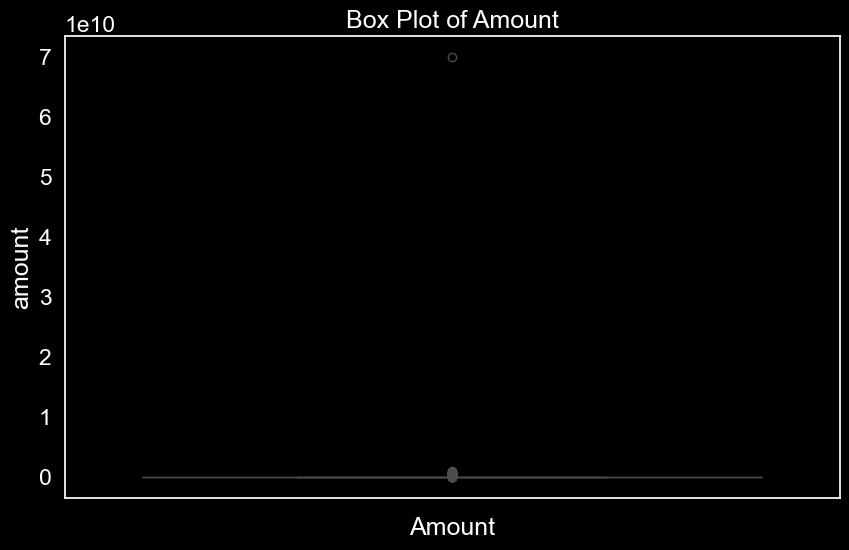

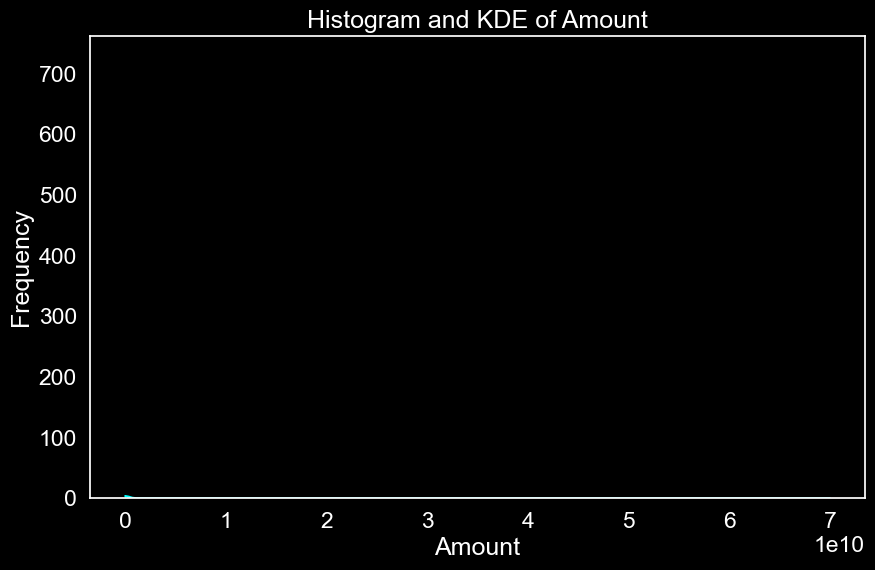

In [58]:
# Descriptive Statistics
print("Descriptive Statistics for 'amount' column:")
print(cl_df['amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df['amount'])
amount_kurtosis = kurtosis(cl_df['amount'])

print(f"\nSkewness for 'Amount' column: {amount_skewness}")
print(f"Kurtosis for 'Amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df['amount'], palette=custom_palette)
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.show()

# Histogram with KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(cl_df['amount'], kde=True, color='cyan')
plt.title('Histogram and KDE of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Filling missing values in 'Stage' column**

Comment`

The numerical values in the 'Amount' column exhibit outliers, making median imputation a more suitable method for addressing missing values. The robustness of the median against outliers ensures that the imputation process is not skewed by extreme values, thus preserving the dataset's integrity. Furthermore, distinct median values observed across different stages support the preference for median imputation, as it accurately reflects the central tendency within each group.

It is important to note that the imputation strategy is designed to fill missing values in the stage column with stage groups based on the median values derived from each stage, which differs from using the mode of the stage column to fill missing values, a common approach for categorical data.

Conversely, if the 'Amount' data were devoid of outliers, mean imputation would be appropriate for handling missing numerical values due to its simplicity and effectiveness in symmetrical distributions. As mentioned earlier for categorical data, mode imputation would be the preferred method, utilizing the most frequently occurring category to maintain the distributional characteristics of the dataset. Although the calculated mean and mode values illustrate these alternative methods, given the current data characteristics, median imputation remains the optimal choice.

In [59]:
# Define a function to fill missing stages based on median amounts
def fill_missing_stage1(row):
    if pd.isna(row['stage']):
        for stage, median in median_amounts.items():
            if row['amount'] <= median:
                return stage
        return pd.NA  # Default to NaN if no condition matches
    return row['stage']

# Apply the function to fill missing stages
cl_df['stage'] = cl_df.apply(fill_missing_stage1, axis=1)

# Display information
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2034 non-null   object 
 1   founded        2034 non-null   float64
 2   head_quarter   2034 non-null   object 
 3   sector         2025 non-null   object 
 4   what_it_does   2034 non-null   object 
 5   founders       2034 non-null   object 
 6   investor       2034 non-null   object 
 7   amount         1703 non-null   float64
 8   stage          1799 non-null   object 
 9   funded_year    2034 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 159.0+ KB


In [60]:
# Filter the rows where 'Stage' is missing
filter_min_df = cl_df[cl_df['stage'].isna()]

# Find the minimum 'Amount' value in the filtered DataFrame
filter_min_amount = filter_min_df['amount'].min()

# Print the minimum 'Amount' value
print('The minimum amount value in the filtered dataframe is:', filter_min_amount)

The minimum amount value in the filtered dataframe is: 70000000.0


`Comment`

Based on exploratory analysis of the 'Amount' column within the dataset above, it has been ascertained that the recorded minimum value stands at 70,000,000.0. Consequently, the imputation strategy for missing values in the 'Stage' column entails identifying the stage category whose median amount value closely approximates this observed minimum, while ensuring exclusion of categories labeled as 'debt', 'bridge', or 'private equity'.

Upon meticulous examination of the dataset, it has been established that the 'Exit Options' stage category exhibits the nearest median amount value (65,500,000) to the aforementioned minimum amount. Thus, as an integral part of the imputation process, the missing entries in the 'Stage' column meeting the criterion of possessing a non-null float entry in the corresponding 'Amount' column will be substituted with the 'Scaling' stage category. This aligns with the predefined criteria for selection and ensures coherence in the imputation procedure.

In [63]:
def fill_missing_stage2(row):
    if pd.isna(row['stage']):  # Checking if 'Stage' column is NaN
        if pd.notna(row['amount']):  # Checking if 'Amount' column is not NaN
            return 'exit options'
    return row['stage']

# Apply the function to fill missing stages
cl_df['stage'] = cl_df.apply(fill_missing_stage2, axis=1)

# Display information
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2034 non-null   object 
 1   founded        2034 non-null   float64
 2   head_quarter   2034 non-null   object 
 3   sector         2025 non-null   object 
 4   what_it_does   2034 non-null   object 
 5   founders       2034 non-null   object 
 6   investor       2034 non-null   object 
 7   amount         1703 non-null   float64
 8   stage          1867 non-null   object 
 9   funded_year    2034 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 159.0+ KB


**Filling missing values in 'Amount' column**

`Comment`

In the task of filling missing values in the 'Amount' column, multiple imputation emerges as a superior choice over KNN imputation due to its robustness, adaptability, and modeling capabilities. Multiple imputation, by modeling the entire distribution of the data, exhibits heightened resilience to outliers compared to KNN imputation, which is sensitive to outlier influence owing to its reliance on distance metrics. Furthermore, the suitability of multiple imputation extends to scenarios where missing data follows either a missing at random (MAR) or missing completely at random (MCAR) pattern, as it can effectively model various missing data mechanisms using observed data. In contrast, while KNN imputation excels in scenarios of localized missing data patterns, its assumption of local similarity may lead to suboptimal imputations in more complex or non-localized missing data scenarios.

In [64]:
# Select only the columns with missing values
X_missing = cl_df[['amount']]  

# Initialize IterativeImputer
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)  

# Fit and transform the data, and fill missing values directly in the DataFrame
cl_df[['amount']] = multiple_imputer.fit_transform(X_missing)  

# Display DataFrame information
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2034 non-null   object 
 1   founded        2034 non-null   float64
 2   head_quarter   2034 non-null   object 
 3   sector         2025 non-null   object 
 4   what_it_does   2034 non-null   object 
 5   founders       2034 non-null   object 
 6   investor       2034 non-null   object 
 7   amount         2034 non-null   float64
 8   stage          1867 non-null   object 
 9   funded_year    2034 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 159.0+ KB


**Complete filling missing values in 'Stage' column**

In [66]:
# Find indices of missing values in the original 'Amount' column
missing_indices = np.where(X_missing.isna())[0]

# Extract unique imputed values using indices
cl_df_imputed = (cl_df.iloc[missing_indices]['amount']).unique()

# Print the unique imputed values
print(cl_df_imputed)

[66962983.97181445]


`Comment`

The imputation process has yielded a unique value of 6,696,2983.97181445 for the 'Amount' column. Consequently, the imputation strategy for missing values in the 'Stage' column involves identifying the stage category whose median amount closely approximates this observed value, while ensuring exclusion of categories labeled as 'debt', 'bridge', or 'private equity'.

After thorough scrutiny of the dataset, it has been determined that the 'Early Traction' stage category exhibits the closest median amount value (6,000,000) to the aforementioned amount value. Hence, the remaining missing values in the 'Stage' column will be replaced with the 'Early Traction' stage category. This decision adheres to the predefined selection criteria, ensuring consistency and coherence in the imputation process.

In [67]:
# Apply the function to fill missing stages
cl_df['stage'] = cl_df.apply(fill_missing_stage2, axis=1)

# Determine the proportion of missing values
missing_cl_df_ed = (cl_df.isnull().mean() * 100).round(2)

# Display Results
print("Proportion of missing values in dataset:")
print()
print(missing_cl_df_ed)

Proportion of missing values in dataset:

company_brand    0.00
founded          0.00
head_quarter     0.00
sector           0.44
what_it_does     0.00
founders         0.00
investor         0.00
amount           0.00
stage            0.00
funded_year      0.00
dtype: float64


##### Standardise Formats

In [68]:
# Standardize 'Founded Year' column to integer datatype
cl_df['founded'] = cl_df['founded'].astype(int)

# Identify object columns (excluding 'What_it_does' and 'Company_Brand')
object_columns_to_convert = [col for col in cl_df.select_dtypes(include=['object']).columns
                             if col not in ['what_it_does', 'company_brand']]

# Convert object columns to category datatype
cl_df[object_columns_to_convert] = cl_df[object_columns_to_convert].astype('category')

cl_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   company_brand  2034 non-null   object  
 1   founded        2034 non-null   int32   
 2   head_quarter   2034 non-null   category
 3   sector         2025 non-null   category
 4   what_it_does   2034 non-null   object  
 5   founders       2034 non-null   category
 6   investor       2034 non-null   category
 7   amount         2034 non-null   float64 
 8   stage          2034 non-null   category
 9   funded_year    2034 non-null   int64   
dtypes: category(5), float64(1), int32(1), int64(1), object(2)
memory usage: 831.0 KB


In [69]:
# Convert 'founded' column to datetime

cl_df['founded'] = pd.to_datetime(cl_df['founded'], format='%Y', errors='coerce')

cl_df['founded'] = cl_df['founded'].dt.to_period('Y')

cl_df['founded'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2034 entries, 0 to 2033
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2034 non-null   period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 16.0 KB
